In [1]:
import random
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def factorial(positive_integer):
    num = 1
    for i in range(1,positive_integer+1):
        num = i * num

    
    return num




def normal_dist(mu,var,data_range1,data_range2):

    dist_values = []
    for i in range(data_range1,data_range2):
        d = 1/(math.sqrt(2*math.pi) * var) * math.exp(-1/2*((i-mu)/var)**2)
        dist_values.append(d)



    return dist_values

def random_generator(begin,end):
    data = []
    for i in range(0,100):
        a = random.randint(begin,end)
        data.append(a)
    return data

def poisson_dist(mean,kounts,data_range_b,data_range_e):
   
    poisson_values = []
    probabilities = []
    for i in range(data_range_b,data_range_e):
        a = (mean**i) * math.exp(-mean) / math.factorial(i)
        poisson_values.append(a)
    prob = (mean**kounts) * math.exp(-mean) / math.factorial(kounts)
    return poisson_values,prob

def binomial_dist(cluster,outcome,probability,variety):
    binomial_values = []
    probabilities = 0
    for i in range(0,cluster):
        a = factorial(variety)*(math.factorial(cluster)/math.factorial(cluster-i))/math.factorial(i)*(probability**i)\
        *(1-probability)**(cluster-i)

        binomial_values.append(a)
    b = factorial(variety)*(factorial(cluster)/factorial(cluster-outcome)/factorial(outcome))*(probability**outcome)\
    *(1-probability)**(cluster-outcome)
    probabilities = b
    return binomial_values,probabilities


In [3]:
data = pd.read_excel("poisson_raw.xlsx",names = ["counts_10s","counts_1s"])
interval =  pd.read_excel("time interval.xlsx",names = ["interval_time_incm"])

counts10s = data.counts_10s.tolist()
counts1s = data.counts_1s.tolist()

interval_data = pd.read_excel("time interval.xlsx",names = ["time_interval"])

inter = interval_data.time_interval.tolist()

print(inter)

[0.5, 1.2, 3.9, 0.1, 3.0, 0.6, 0.7, 2.1, 0.3, 0.7, 0.7, 0.2, 0.5, 1.8, 2.0, 0.9, 0.3, 1.8, 3.4, 0.4, 0.6, 0.6, 0.1, 0.1, 0.2, 0.6, 0.6, 2.3, 0.1, 1.4, 0.9, 0.5, 2.3, 2.0, 0.7, 2.2, 0.2, 0.4, 0.4, 0.5, 0.8, 0.2, 0.6, 0.1, 1.5, 1.9, 1.2, 1.9, 0.7, 0.4, 0.6, 7.7, 3.6, 0.8, 3.5, 3.3, 2.6, 3.0, 1.7, 1.2, 0.4, 0.8, 0.3, 0.5, 0.8, 1.2, 2.0, 1.1, 2.8, 0.6, 0.3, 1.1, 0.5, 0.9, 0.4, 2.4, 1.7, 2.0, 1.8, 0.3, 0.1, 1.0, 0.5, 2.8, 1.1, 0.9, 0.6, 1.4, 4.2, 1.5, 0.3, 1.2, 1.3, 1.9, 0.3, 1.7, 2.8, 0.1, 1.3, 0.5, 0.6, 1.5, 0.7, 0.2, 1.3, 0.6, 2.2, 0.5, 0.4, 1.0, 0.8, 0.1, 0.5, 0.6, 0.8, 1.9, 5.3, 0.9, 1.1, 2.2, 1.1, 0.4, 2.2, 0.2, 0.9, 0.5, 1.2, 0.2, 0.5, 0.9, 0.3, 1.1, 0.5, 0.8, 0.3, 0.3, 1.4, 1.5, 1.9, 1.2, 0.3, 2.0, 1.1, 2.1, 0.8, 0.4, 0.5, 0.2, 2.3, 0.4, 2.0, 2.8, 0.2, 3.1, 0.3, 0.7, 0.8, 0.6, 0.9, 0.4, 2.1, 2.7, 5.6, 1.2]


In [6]:
print(len(inter))
print(sum(inter))

164
200.59999999999997


In [5]:
c10=[0,0,0,0,0,0,0,0,0,0]


for i in counts10s:
    if i <= 71:
        c10[0] += 1
        
    elif (i <= 77) and (i > 71):
        c10[1] += 1
        
    elif (i <= 83) and (i > 77):
        c10[2] += 1
        
    elif (i <= 89) and (i > 83):
        c10[3] += 1
        
    elif (i <= 95) and (i > 89):
        c10[4] += 1
        
    elif (i <= 101) and (i > 95):
        c10[5] += 1
        
    elif (i <= 107) and (i > 101):
        c10[6] += 1
        
    elif (i <= 113) and (i > 107):
        c10[7] += 1
    elif (i <= 119) and (i > 113):
        c10[8] += 1
        
    elif  (i > 119):
        c10[9] += 1
    

In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.special import factorial
import matplotlib.lines as mlines


er=list(np.array(c10)**(1/2))
c10er = np.round(np.array(er),0)

sıralama = [65, 71, 77, 83, 89, 95, 101, 107, 113, 119]

orta = [68,74,80,86,91,98,104,110,116,122]




def fit_func(p, x):
    a ,mu,sigma = p
    return a*np.exp(-(x-mu)**2/(2.*(sigma**2)))

linear = Model(fit_func)

data = RealData(orta, c10, sy=c10er)

odr= ODR(data, linear, beta0=[70., np.mean(counts10s) , np.std(counts10s)])

out = odr.run()

out.pprint()


x_fit = np.linspace(orta[0]-0.5, orta[-1]+0.5, 1000)
y_fit = fit_func(out.beta, x_fit)


plt.figure(figsize=(10,10))
plt.plot(x_fit, y_fit)


def fit_func1(p, x):
    a ,mu = p
    return a*((mu**x)*np.exp(-mu))/factorial(x, exact=False)

linear1 = Model(fit_func1)

data1 = RealData(orta, c10, sy=c10er)

odr1= ODR(data1, linear1, beta0=[70., np.mean(counts10s)])

out1 = odr1.run()

out1.pprint()


x_fit1 = np.linspace(orta[0]-0.5, orta[-1]+0.5, 1000)
y_fit1 = fit_func1(out1.beta, x_fit1)



plt.plot(x_fit1, y_fit1)



plt.bar(orta, c10, width=8, align='center', color='pink',yerr=c10er,edgecolor = "green",linewidth = 1,ecolor = "red")
plt.grid(alpha =0.2)
ax=plt.subplot()
ax.set_xticks(orta)
ax.set_yticks(c10)
plt.xlabel('Counts in 10 second')
plt.ylabel('Distribution of counts and probabilities')
data = mlines.Line2D([], [], color='royalblue', marker=',',markersize=15, label='gaussian fit')
data2 = mlines.Line2D([], [], color='orange', marker=',',markersize=15, label= 'poisson fit')
plt.legend(handles=[data,data2])
plt.show()

def funcg(x):
    return out.beta[0]*np.exp(-(x-out.beta[1])**2/(2.*(out.beta[2]**2)))
chi2g=0
for i in range(len(orta)):
    chi2g += ((funcg(orta[i])-c10[i])/c10er[i])**2

    
def funcp(x):
    return out1.beta[0]*((out1.beta[1]**x)*np.exp(-out1.beta[1]))/factorial(x, exact=False)
chi2p=0
for i in range(len(orta)):
    chi2p += ((funcp(orta[i])-c10[i])/c10er[i])**2
    

print('gauss chi2: ', chi2g/len(orta))   
print('poisson chi2: ', chi2p/len(orta))  
plt.show()


Beta: [22.22799422 97.15181536 10.39474026]
Beta Std Error: [3.11129896 1.12876355 0.88654927]
Beta Covariance: [[ 9.87034421 -0.49775951 -1.78600583]
 [-0.49775951  1.29913645  0.22665897]
 [-1.78600583  0.22665897  0.80140964]]
Residual Variance: 0.9807339036347121
Inverse Condition #: 0.23238214532204782
Reason(s) for Halting:
  Sum of squares convergence


<IPython.core.display.Javascript object>

Beta: [582.81498993  97.03702979]
Beta Std Error: [58.5791618   1.00241187]
Beta Covariance: [[ 4.07613606e+03 -3.49571426e-01]
 [-3.49571426e-01  1.19358888e+00]]
Residual Variance: 0.8418556556919543
Inverse Condition #: 0.017398079786572575
Reason(s) for Halting:
  Sum of squares convergence
gauss chi2:  0.7355523159893812
poisson chi2:  0.7163412400889847


C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [7]:
'''c1=[0,0,0,0,0,0]

#1s aralıklar 3 [5,8,11,14,17,20]
for i in counts1s:
    if i <= 5:
        c1[0] += 1
        
    elif (i <= 8) and (i > 5):
        c1[1] += 1
        
    elif (i <= 11) and (i > 8):
        c1[2] += 1
        
    elif (i <= 14) and (i > 11):
        c1[3] += 1
        
    elif (i <= 17) and (i > 14):
        c1[4] += 1
        
    elif (i <= 20) and (i > 17):
        c1[5] += 1
            '''

#1s aralıklar 4[5,9,13,17,21]
c1=[0,0,0,0,0]

for i in counts1s:
    if i <= 5:
        c1[0] += 1
        
    elif (i <= 9) and (i > 5):
        c1[1] += 1
        
    elif (i <= 13) and (i > 9):
        c1[2] += 1
        
    elif (i <= 17) and (i > 13):
        c1[3] += 1
        
    elif (i <= 21) and (i > 17):
        c1[4] += 1
        
    
  

In [8]:
print(c1)

[7, 41, 43, 8, 1]


Beta: [50.437923   11.1964564   3.20810009]
Beta Std Error: [4.07859715 0.24905103 0.17839204]
Beta Covariance: [[ 9.59504478e+01  3.13498077e-01 -2.25620932e+00]
 [ 3.13498077e-01  3.57768476e-01 -3.42344057e-02]
 [-2.25620932e+00 -3.42344057e-02  1.83559281e-01]]
Residual Variance: 0.17337026615677592
Inverse Condition #: 0.36671197771639635
Reason(s) for Halting:
  Sum of squares convergence


<IPython.core.display.Javascript object>


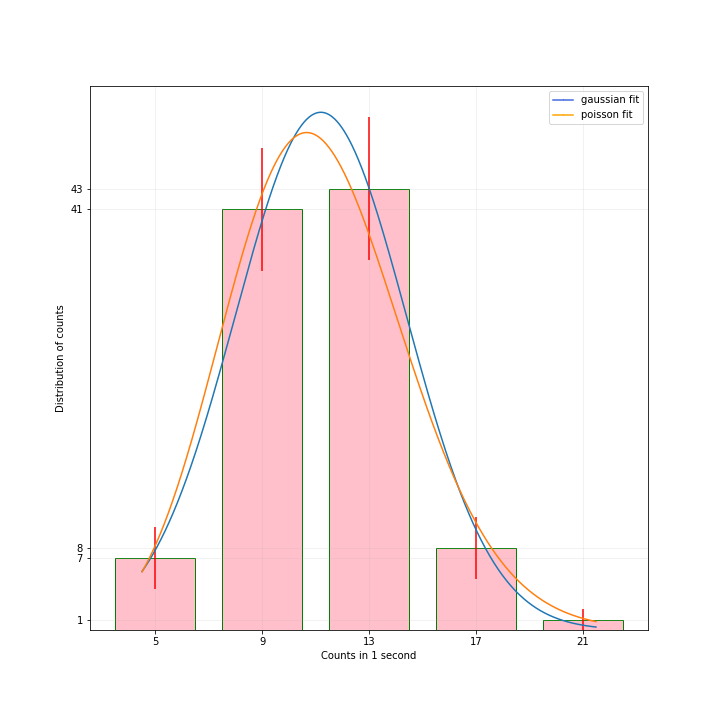

Beta: [404.48377786  11.16904419]
Beta Std Error: [25.37966412  0.23009203]
Beta Covariance: [[3.88587839e+03 2.26664585e-01]
 [2.26664585e-01 3.19389496e-01]]
Residual Variance: 0.16576106785899905
Inverse Condition #: 0.009146711217015433
Reason(s) for Halting:
  Sum of squares convergence
gauss chi2:  0.15047810186329785
poisson chi2:  0.27210662771250826


C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [10]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.special import factorial
import matplotlib.lines as mlines


er1=list(np.array(c1)**(1/2))
c1er = np.round(np.array(er1),0)

sıralama = [65, 71, 77, 83, 89, 95, 101, 107, 113, 119]

orta1 = [2,5,8,11,14,17]
#orta1 = [5,9,13,17,21]




def fit_func(p, x):#Gaussian
    a ,mu,sigma = p
    return a*np.exp(-(x-mu)**2/(2.*(sigma**2)))

linear = Model(fit_func)

data = RealData(orta1, c1, sy=c1er)

odr= ODR(data, linear, beta0=[70., np.mean(counts1s) , np.std(counts1s)])

out = odr.run()

out.pprint()


x_fit = np.linspace(orta1[0]-0.5, orta1[-1]+0.5, 1000)
y_fit = fit_func(out.beta, x_fit)


plt.figure(figsize=(10,10))
plt.plot(x_fit, y_fit)


def fit_func1(p, x):#Poisson
    a ,mu = p
    return a*((mu**x)*np.exp(-mu))/factorial(x, exact=False)

linear1 = Model(fit_func1)

data1 = RealData(orta1, c1, sy=c1er)

odr1= ODR(data1, linear1, beta0=[70., np.mean(counts1s)])

out1 = odr1.run()

out1.pprint()


x_fit1 = np.linspace(orta1[0]-0.5, orta1[-1]+0.5, 1000)
y_fit1 = fit_func1(out1.beta, x_fit1)



plt.plot(x_fit1, y_fit1)



plt.bar(orta1, c1, width=3, align='center', color='pink',yerr=c1er,edgecolor = "green",linewidth = 1,ecolor = "red")
plt.grid(alpha =0.2)
ax=plt.subplot()
ax.set_xticks(orta1)
ax.set_yticks(c1)
plt.xlabel('Counts in 1 second')
plt.ylabel('Distribution of counts')
data = mlines.Line2D([], [], color='royalblue', marker=',',markersize=15, label='gaussian fit')
data2 = mlines.Line2D([], [], color='orange', marker=',',markersize=15, label= 'poisson fit')
plt.legend(handles=[data,data2])
plt.show()

def funcg(x):
    return out.beta[0]*np.exp(-(x-out.beta[1])**2/(2.*(out.beta[2]**2)))
chi2g=0
for i in range(len(orta1)):
    chi2g += ((funcg(orta1[i])-c1[i])/c1er[i])**2

    
def funcp(x):
    return out1.beta[0]*((out1.beta[1]**x)*np.exp(-out1.beta[1]))/factorial(x, exact=False)
chi2p=0
for i in range(len(orta1)):
    chi2p += ((funcp(orta1[i])-c1[i])/c1er[i])**2
    

print('gauss chi2: ', chi2g/len(orta1))   
print('poisson chi2: ', chi2p/len(orta1))  



In [ ]:
part 3

In [12]:
np.std(inter)

1.133287768385698

In [30]:
'''t=[0,3.5,3.8,4.5,6.0,6.5,7.4,8.1,9.2,10.1,10.6,11.2,11.9,12.7,14.0,14.2,15.4,16.0,17.7,17.9,19.1,20.4,21.5,21.9,22.5,22.9,23.6,24.6,25.9,27.8,28.3,29.7,30.3,31.2,32.2,32.6,34.4,35.6,35.7,36.1,36.3,36.5,37.4,39.0,42.0,43.2,44.5,46.0,47.3,48.9,49.5,50.0,50.4,51.5,51.7,52.5,53.1,54.5,55.4,56.6,57.0,59.1,62.2,62.9,63.6,63.8,64.1,66.2,67.1,70.4,70.8,71.4,72.5,72.9,73.7,74.1,75.3,75.5,75.8,77.3,79.2,80.2,83.0,83.6,83.7,83.8,84.4,85.6,86.4,87.0,88.0,88.4,88.8,89.5,90.0,90.9,92.0,92.2,93.9,95.2,96.0,97.2,97.4,99.1,99.5,100.1,100.2,100.8,101.2,102.1,103.0,103.2,104.0,107.3,108.3,108.9,109.2,110.1,110.5,110.7,111.2,111.6,112.2,114.6]
tn0=[]
for i in range(len(t)-1):
    tn0.append(round(t[i+1]-t[i],2))

tn1=[]
for i in range(len(t)-2):
    tn1.append(round(t[i+2]-t[i],2))'''

9.848857801796104

In [8]:
tnn0=[0,0,0,0]

for i in range(len(inter)-1):
    if inter[i] <= 1.:
        tnn0[0] += 1
    elif inter[i] <= 2.:
        tnn0[1] += 1   
    elif inter[i] <= 3.:
        tnn0[2] += 1
    elif inter[i] <= 4.:
        tnn0[3] += 1
    
print(tnn0)

[93, 41, 19, 6]


Beta: [156.74153406   0.9039427 ]
Beta Std Error: [21.65262324  0.06155174]
Beta Covariance: [[2.19247824e+04 5.42795846e+01]
 [5.42795846e+01 1.77171943e-01]]
Residual Variance: 0.021383842481201527
Inverse Condition #: 0.00013968881232702776
Reason(s) for Halting:
  Sum of squares convergence


<IPython.core.display.Javascript object>


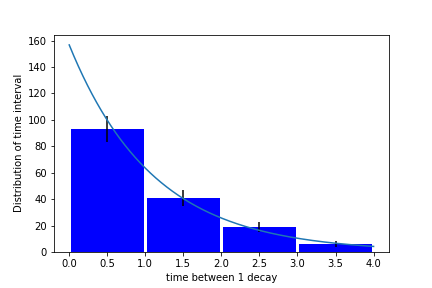

poisson chi2:  0.2497396340426176


In [9]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

er=list(np.array(tnn0)**(1/2))
tn0er = np.round(np.array(er),0)


tt=[0.5,1.5,2.5,3.5]




def fit_func(p, t):
    a ,alpha = p
    return a*(np.exp(-alpha*t))

linear = Model(fit_func)

data = RealData(tt, tnn0, sy=tn0er)

odr= ODR(data, linear, beta0=[0., 1.])

out = odr.run()

out.pprint()

x_fit = np.linspace(tt[0]-0.5, tt[-1]+0.5, 1000)
y_fit = fit_func(out.beta, x_fit)



plt.plot(x_fit, y_fit)



plt.bar(tt, tnn0, width=0.96, align='center', color='blue',yerr=tn0er)
plt.xlabel('time between 1 decay')
plt.ylabel('Distribution of time interval')
plt.show()


def funcp(t):
    return out.beta[0]*(np.exp(-out.beta[1]*t))
chi2p=0
for i in range(len(tt)):
    chi2p += ((funcp(tt[i])-tnn0[i])/tn0er[i])**2
     
print('poisson chi2: ', chi2p/len(tt)) 

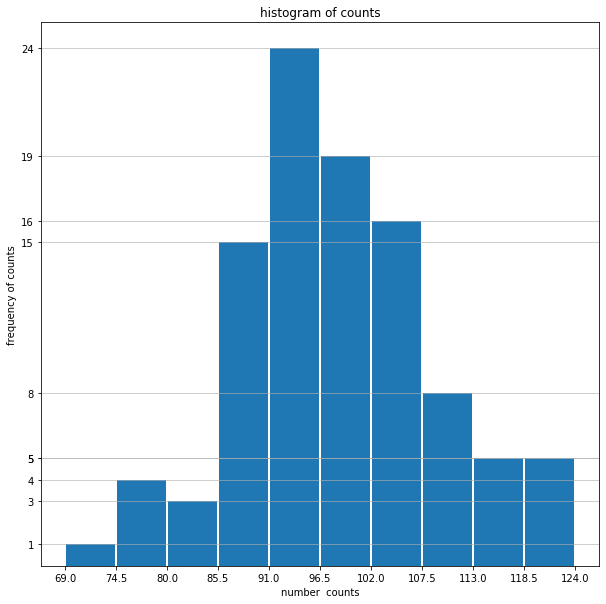

In [13]:
plt.figure(figsize = (10,10))
ax = plt.subplot()
freq10, bins10, patches = plt.hist(data["10s_count"], bins = 10, rwidth = 0.95, )
plt.grid(axis ="y",alpha = 0.75)
ax.set_xticks(bins10)
ax.set_yticks(freq10)
plt.xlabel("number  counts")
plt.ylabel("frequency of counts")
plt.title("histogram of counts")
plt.show()

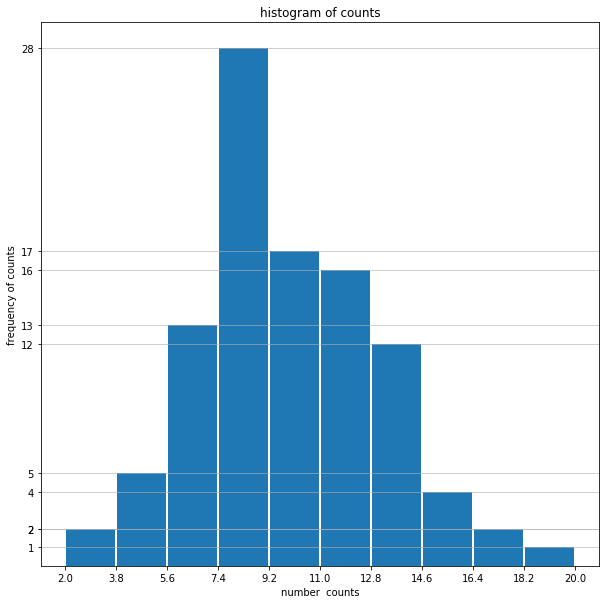

In [54]:
plt.figure(figsize = (10,10))
ax = plt.subplot()
freq1, bins1, patches = plt.hist(data["1s_counts"],bins = 10, rwidth = 0.95)
plt.grid(axis ="y",alpha = 0.75)
ax.set_xticks(bins1)
ax.set_yticks(freq1)
plt.xlabel("number  counts")
plt.ylabel("frequency of counts")
plt.title("histogram of counts")
plt.show()

In [55]:
s10_mean = np.mean(data["10s_count"])
s1_mean = np.mean(data["1s_counts"])
s10_std = np.std(data["10s_count"])
s1_std = np.std(data["1s_counts"])



In [56]:
graphingp,probp = poisson_dist(s10_mean,1,69,130)
graphingn = normal_dist(s10_mean,s10_std,69,130)

In [57]:
plt.plot(graphing)
plt.plot(graphingn)